In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np 
import pandas as pd 
import os
from string import punctuation
import operator 
import re 
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

In [10]:
import matplotlib.pyplot as plt



In [2]:
stop_words=["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

In [3]:
specialChar_and_dig = set(punctuation)

for i in range(0,10):
    specialChar_and_dig.add(str(i))
print(specialChar_and_dig)

{'"', "'", '3', ':', '.', '%', '?', '4', '\\', '#', '5', '^', '=', '>', '1', '7', '9', '+', '[', '/', '0', '~', '2', '{', '8', '*', '$', '!', '}', ']', '_', '`', '6', '@', '|', '(', ')', ';', '<', ',', '&', '-'}


In [4]:
#  string all the datasrt from the folder 
all_classes = os.listdir("20_newsgroups")
# count = 0 
# for i in all_classes:
#     count +=1 
# print(count)

In [5]:
# creating a dictonary 
# contain the key and value 
word_dict = {}
# use cont for check the progess for the run time 
count = 1 
# scan all the class 
for class_ in all_classes:
    # storing the all documents in a list for a particular class
    all_docs = os.listdir("20_newsgroups"+"/"+class_)
    # WE ARE JUST INSERTING ALL  THE CLASS ONE BY ONE SO IT WILL EASY FOR US TO ITRATE THE TXT ONE BY ONE 
    # now we are traversing all the document one by one 
    for docs in all_docs:
        # getting the base path which is common for all documents of a particular class
        path = "20_newsgroups"+"/"+class_+"/"+docs
        
        
        # opening the particular document as file object
        with open(path, encoding = "latin-1") as file_obj:
            
            #read the data 
            file_data = file_obj.read()
            # print(file_data)
            # stroing each words in a list , used re to remove the whitespaces 
            tokens = re.compile('\w+').findall(file_data)
            
            # traversing through all words and updating the value in dictionary if already exist otherwise will add to it
            for word in tokens:
                if(word.lower() not in stop_words) and (word.lower().isalpha()) and (len(word.lower()) > 3):
                    # getting the value of word from dictionary and increasing its count by 1 if word does not exists in dictionart then adding it with count 1
                    word_dict[word.lower()] = word_dict.get(word.lower(),0) +1
                    
    print(count , "Class done")
    count+= 1 
                    
                    

                    
            
            
            
        
        
    
# print(all_docs)
    

1 Class done
2 Class done
3 Class done
4 Class done
5 Class done
6 Class done
7 Class done
8 Class done
9 Class done
10 Class done
11 Class done
12 Class done
13 Class done
14 Class done
15 Class done
16 Class done
17 Class done
18 Class done
19 Class done
20 Class done


In [8]:
# sort thr dictionary in a order of count
word_dict= dict(sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True))
word_dict



{'news': 34309,
 'cantaloupe': 26048,
 'message': 21954,
 'subject': 21589,
 'lines': 20894,
 'date': 20787,
 'newsgroups': 20404,
 'path': 20369,
 'organization': 19840,
 'state': 18842,
 'ohio': 15887,
 'writes': 14686,
 'article': 13435,
 'comp': 13101,
 'references': 12981,
 'talk': 12308,
 'misc': 11892,
 'sender': 11040,
 'howland': 10981,
 'reston': 10946,
 'people': 10364,
 'like': 10350,
 'just': 9978,
 'university': 9958,
 'posting': 9793,
 'nntp': 9377,
 'know': 9173,
 'host': 8934,
 'think': 8315,
 'usenet': 8308,
 'zaphod': 8302,
 'politics': 7869,
 'windows': 7584,
 'does': 7267,
 'time': 7073,
 'rutgers': 7014,
 'harvard': 6923,
 'near': 6868,
 'good': 6308,
 'crabapple': 6235,
 'xref': 6064,
 'europa': 5448,
 'gtefsd': 5429,
 'uunet': 5369,
 'world': 5354,
 'religion': 5351,
 'make': 5191,
 'christian': 5129,
 'right': 4943,
 'rochester': 4851,
 'distribution': 4753,
 'club': 4617,
 'space': 4544,
 'mail': 4511,
 'andrew': 4458,
 'want': 4442,
 'gatech': 4413,
 'magnesi

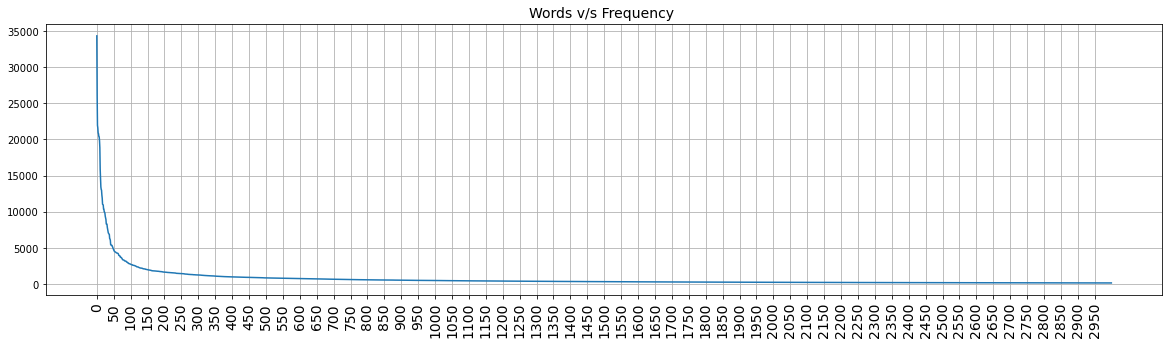

In [21]:
# storing the words ( keys of dictionary) and its frequencies ( values of dictionary) in a array inorder to plot the graph
words = [key for key,val in word_dict.items()]
frequencies = [val for key, val in word_dict.items()]
# setting the limit to avoid the least frequencies words

lower_limit=0   
upper_limit=3000    
plt.figure(figsize=(20, 5))

plt.plot(np.arange(len(words))[lower_limit:upper_limit],frequencies[lower_limit:upper_limit])

plt.title("Words v/s Frequency ",size=14)

plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=90,size=14)
plt.grid()
plt.show()


From the graph we can visualize that the frequencies of words after the index 3000 is almost close to 0. So, we would pick the top 3000 words for building the vocabulary



In [24]:
# pick of only 3000 word from this because after 3000 it seem as zero so 
words = words[:3000]
frequencies = frequencies[:3000]
print(len(words))


3000


### bulid the data set from given Doument 


In [ ]:
# dataset is a array to store the datapoints of all documents
dataset = []

# getting all the class names in a list
all_classes = os.listdir("20_newsgroups")

# using count for checking the progress during runtime
class_count = 1

# traversing through each class
for class_ in all_classes:
    # storing the all documents in a list for a particular class
    all_docs = os.listdir("20_newsgroups"+"/"+class_)
    
    # traversing through each documents of a particular class
    for docs in all_docs:
        
        # initializing all the features of a datapoint with 0
        datapoint = [0]*len(words)
        
        path = "20_newsgroups"+"/"+class_+"/"+docs
        with open(path, encoding = "latin-1") as file_obj:
            #reading the document data 
            file_data = file_obj.read()
            
            # storing each word in a list 
            tokens = re.compile('\w+').findall(file_data)
            
            for word in tokens:
                word = word.lower()
                
                # if the word is in vocabulary then increaseing 
                if word in words:
                    datapoint[word.index(word)] = datapoint[word.index(word)] + 1
        
        #appending the class name to target coloumn of the data point 
        datapoint.append(class_)
        #adding the data point  to data set
        dataset.append(datapoint)
    #using print to check the progress during the runTime 
    print(class_count , " class done ")
    class_count += 1 
print(len(dataset))    
        
            

        
        
        

In [43]:
# dataset is a array to store the datapoints of all documents
dataset = []

# getting all the class names in a list
all_classes = os.listdir("20_newsgroups")

# using count for checking the progress during runtime
class_count = 1

# traversing through each class
for class_ in all_classes:
    # storing the all documents in a list for a particular class
    all_docs = os.listdir("20_newsgroups"+"/"+class_)
    
    # traversing through each documents of a particular class
    for docs in all_docs:
        
        # initializing all the features of a datapoint with 0
        datapoint = [0]*len(words)
        
        # getting the base path which is common for all documents of a particular class
        path = "20_newsgroups"+"/"+class_+"/"+docs
        
        # opening the particular document as file object   
        with open(path, encoding = "latin-1") as file_obj:
            
            # reading the document data
            file_data = file_obj.read()
            
            # stroing each words in a list , used re to remove the whitespaces 
            tokens = re.compile('\w+').findall(file_data)
            
            # traversing through each word in token and checking if it is in vocabulary or not
            for word in tokens:
                word = word.lower()
                
                # if the word is in vocabulary then increasing its count by 1 otherwise continue
                if word in words:
                    datapoint[words.index(word)] = datapoint[words.index(word)] + 1
                    
        # appending the class name to target column of the datapoint to which class it belongs
        datapoint.append(class_)
        
        # adding the datapoint to the dataset
        dataset.append(datapoint)
        
    # using print to check the progress during the runtime
    print(class_count, "Class done")
    class_count+=1
print(len(dataset))

1 Class done
2 Class done
3 Class done
4 Class done
5 Class done
6 Class done
7 Class done
8 Class done
9 Class done
10 Class done
11 Class done
12 Class done
13 Class done
14 Class done
15 Class done
16 Class done
17 Class done
18 Class done
19 Class done
20 Class done
19997


In [44]:
# adding a column to words which will be the target for the particular datapoint
words.append("CLASS")


In [45]:
# converting dataset array to the pandas DataFrame
data_df = pd.DataFrame(dataset,columns = words, index = None)
data_df.head()


,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,albany,northeastern,vram,cacs,clarku,listening,campaign,wearing,ccwf,CLASS
0,4,2,1,1,2,1,1,1,2,2,...,0,0,0,0,0,1,0,0,0,alt.atheism
1,3,2,2,2,1,1,1,1,2,9,...,0,0,0,0,0,0,2,0,0,alt.atheism
2,2,1,1,1,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
3,1,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,alt.atheism
4,0,2,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,alt.atheism


In [46]:
data_df.describe(include="all")


,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,albany,northeastern,vram,cacs,clarku,listening,campaign,wearing,ccwf,CLASS
count,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,...,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alt.atheism
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,1.715707,1.302595,1.097865,1.079612,1.044857,1.039506,1.020353,1.018603,0.992149,0.942241,...,0.008501,0.008501,0.008501,0.008501,0.008501,0.008451,0.008451,0.008451,0.008451,NaN
std,1.480837,0.459393,0.554378,0.779541,0.362166,0.316006,0.230535,0.280838,0.309528,1.302672,...,0.202820,0.170099,0.184485,0.173302,0.200589,0.099903,0.126023,0.124827,0.151272,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Saving the Dataset to a CSV file


In [48]:
data_df.to_csv("text_classification_dataset.csv",index=False)


In [51]:
 Y = data_df["CLASS"]

In [52]:
X = data_df[data_df.columns[:-1]].values


Using Sklearn multinomialNB Classifier


In [53]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)


In [55]:
# creating a classifier objecy
clf = MultinomialNB()

# fitting the classifier object to training data
clf.fit(X_train, Y_train)

# testing the classifier and storing the predicted Y_pred classes
Y_pred = clf.predict(X_test)


In [56]:
# Generating the classification report and printing the confusion matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       233
           comp.graphics       0.83      0.78      0.81       253
 comp.os.ms-windows.misc       0.77      0.88      0.82       249
comp.sys.ibm.pc.hardware       0.65      0.78      0.71       240
   comp.sys.mac.hardware       0.75      0.76      0.75       236
          comp.windows.x       0.91      0.73      0.81       240
            misc.forsale       0.85      0.92      0.88       261
               rec.autos       0.88      0.90      0.89       269
         rec.motorcycles       0.91      0.95      0.93       284
      rec.sport.baseball       0.97      0.93      0.95       248
        rec.sport.hockey       0.92      0.99      0.96       231
               sci.crypt       0.98      0.95      0.97       233
         sci.electronics       0.88      0.85      0.86       244
                 sci.med       0.95      0.78      0.86       256
         

In [57]:
# storing the classification report to comparing it with own multinomial Naive Bayes classifier
report_list_sklearn = classification_report(Y_test,Y_pred).split("\n")
for i in report_list_sklearn:
    if i=="":
        report_list_sklearn.remove(i)
sklearn_classifier_score = []
class_names = []
for i in report_list_sklearn[1:-3]:
    sklearn_classifier_score.append(float(i.split()[3]))
    class_names.append(i.split()[0])